# Read Daily Incidence Cases For USA's states
#Data from NYTime repositiory
#Author: Imelda Trejo
#Last update: Feb, 18, 2022

In [2]:
# Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import datetime


In [3]:
#----Read data from NY-times newspaper repository
#----reports started at diferent days from 2020
#----reports started at diferent days from 2021
baseURL="C:/Users/tui2/OneDrive - CDC/CDC_my_documments/Python_Codes_PLoS_One_revised_2021/data/utOrder.csv"
    
myData=pd.read_csv(baseURL,skipinitialspace=True)
#print(myData.head(10))

#Stratify the data by key_plot (smaller resolution than wwtp)
key_plot=np.array(myData.get(['key_plot'])).ravel()


total observed days: n= 760
['Feb-09-22' 'Feb-10-22' 'Feb-11-22' 'Feb-12-22' 'Feb-13-22' 'Feb-14-22'
 'Feb-15-22' 'Feb-16-22' 'Feb-17-22' 'Feb-18-22']
760


In [40]:
def ReadDataUSA(ToSelect,n):
    Y=np.zeros(n)
    myNewData=myData.loc[myData["state"]==ToSelect] #select state
    Tinit=np.array(myNewData.get(['date'])).ravel()[0]
    init=np.where(dateIndex==Tinit)[0][0]
    Yaux=np.array(myNewData.get(['cases'])).ravel()
    nn=len(Yaux)    #total observation for each states: nn<=n
    Y[n-nn:]=Yaux   #start from the its reported cases
    Y[1:n]=Y[1:n]-Y[0:n-1] 
    for k in range(0,n): #clean data
        if Y[k]<0:
            Y[k]=0       
    return Y  

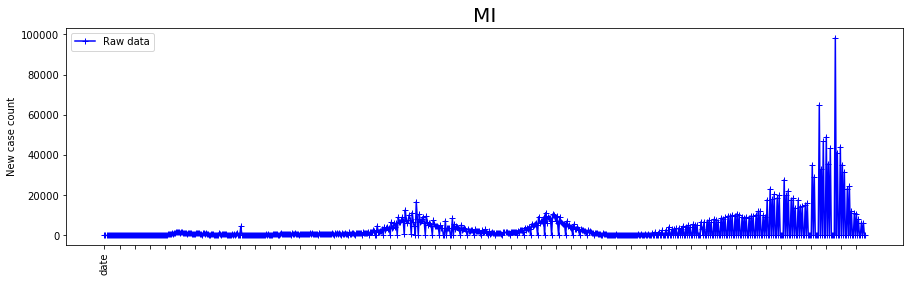

In [46]:
#---"NM=0", "TX=1","NY=2", "CA=3", "FL=4", "MI=5"

key=5
name_state=['New Mexico','Texas','New York','California','Florida','Michigan'][key]
id_state=['NM','TX','NY','CA','FL','MI','Lin','LinPsi1','LinPsi2','LinPsi3'][key]

Yaux=ReadDataUSA(name_state,n)

#----Test
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1,1,1)
ax.plot(Yaux, marker='+', color ='b',label='Raw data')
ax.set_title('%s'% id_state,fontsize=20)
ax.set_xticks(range(0,n,15))
ax.set_xticklabels(dateIndex[::15], rotation=90)
ax.set_ylabel('New case count')
plt.legend()

#-------Save average data -----
np.save("%sY.npy" %name_state,Yaux)


In [ ]:
#----------------Clean data
#NY
#m=np.argmax(Yaux[400:600])+400
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2

#Texas
#m=np.argmax(Yaux)
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2
#m=np.argmax(Yaux[0:400])
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2
#m=np.argmax(Yaux[0:500])
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2
#m=np.argmax(Yaux)
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2


#california 
#print(Yaux[400:])
#m=np.argmax(Yaux[400:600])+400
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2
#m=np.argmax(Yaux[400:600])+400
#Yaux[m]=(Yaux[m-1]+Yaux[m+2])/2

#florida errors
#m=np.argmax(Yaux)
#Yaux[m-2]=(Yaux[m-1]+Yaux[m+2])/2

